1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal
with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be
one of the following reasons: to change the scale for better understanding of the variable, to convert a
non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal
distribution.
4. Reason and document your approach properly.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/students.csv')

In [ ]:
df.head()

,rollno,name,gender,math_score,ds_score,placement,department
0,1,D,male,26.0,34.0,placed,IT
1,2,C,female,76.0,15.0,not_placed,AI&DS
2,3,D,male,49.0,9.0,not_placed,NaN
3,4,E,female,41.0,59.0,NaN,AI&DS
4,5,A,NaN,60.0,76.0,not_placed,IT


In [ ]:
df.tail()

,rollno,name,gender,math_score,ds_score,placement,department
95,96,B,female,83.0,99.0,NaN,AI&DS
96,97,C,male,84.0,99.0,placed,AI&DS
97,98,B,female,63.0,42.0,placed,AI&DS
98,99,B,male,44.0,36.0,not_placed,AI&DS
99,100,B,male,44.0,14.0,not_placed,Computer


In [ ]:
df.columns

Index(['rollno', 'name', 'gender', 'math_score', 'ds_score', 'placement',
       'department'],
      dtype='object')

In [ ]:
df.shape

(100, 7)

In [ ]:
df.describe(include="all")

,rollno,name,gender,math_score,ds_score,placement,department
count,100.000000,100,96,97.000000,97.000000,96,94
unique,NaN,5,2,NaN,NaN,2,3
top,NaN,D,female,NaN,NaN,not_placed,AI&DS
freq,NaN,22,52,NaN,NaN,49,37
mean,50.500000,NaN,NaN,48.907216,49.422680,NaN,NaN
std,29.011492,NaN,NaN,24.888954,26.215388,NaN,NaN
min,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN
25%,25.750000,NaN,NaN,28.000000,30.000000,NaN,NaN
50%,50.500000,NaN,NaN,46.000000,50.000000,NaN,NaN
75%,75.250000,NaN,NaN,70.000000,65.000000,NaN,NaN


In [ ]:
df['gender'] = df['gender'].map({'male':0,'female':1})

In [ ]:
df['placement'] = df['placement'].map({'placed':1,'not_placed':0})

In [ ]:
df['department'] = df['department'].map({"AI&DS": 0, "IT": 1, "Computer": 2})

Finding missing values for each column

In [ ]:
for i in df.columns:
  print(df[df[i].isna() == True])

Empty DataFrame
Columns: [rollno, name, gender, math_score, ds_score, placement, department]
Index: []
Empty DataFrame
Columns: [rollno, name, gender, math_score, ds_score, placement, department]
Index: []
    rollno name  gender  math_score  ds_score  placement  department
4        5    A     NaN        60.0      76.0        0.0         1.0
17      18    C     NaN        80.0      35.0        1.0         1.0
52      53    D     NaN         5.0      62.0        1.0         2.0
62      63    D     NaN        51.0      34.0        0.0         0.0
    rollno name  gender  math_score  ds_score  placement  department
5        6    E     1.0         NaN      55.0        0.0         0.0
49      50    C     1.0         NaN      65.0        1.0         2.0
86      87    A     1.0         NaN      52.0        1.0         0.0
    rollno name  gender  math_score  ds_score  placement  department
8        9    E     1.0        45.0       NaN        0.0         0.0
43      44    D     1.0        46.0

Filling missing values

In [ ]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True)

In [ ]:
df['math_score'].fillna(df['math_score'].mean(),inplace=True)

In [ ]:
df['ds_score'].fillna(df['ds_score'].mean(),inplace=True)

In [ ]:
df['placement'].fillna(df['placement'].mode()[0],inplace=True)

In [ ]:
df['department'].fillna(df['department'].mode()[0],inplace=True)

Creating Outlier

In [ ]:
df['math_score'][43] = 153

Finding outlier using boxplot

<Axes: ylabel='math_score'>

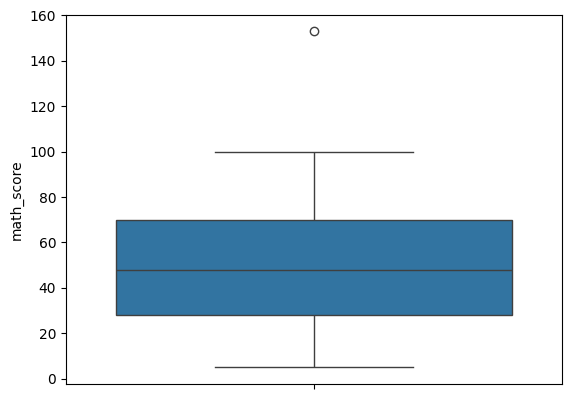

In [ ]:
sns.boxplot(df['math_score'])

Finding outlier using IQR method

In [ ]:
df_sorted = df.copy()
df_sorted['math_score'] = sorted(df['math_score'])
q1=df_sorted['math_score'].quantile(0.25)
q3=df_sorted['math_score'].quantile(0.75)
iqr=q3-q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

Handling outliers by assigning them to 100 and 0 for above upper bound and below lower bound respectively

In [ ]:
df.loc[df['math_score'] > upper_bound,'math_score'] = 100
df.loc[df['math_score'] < lower_bound,'math_score'] = 0

Checking the outliers in boxplot

<Axes: ylabel='math_score'>

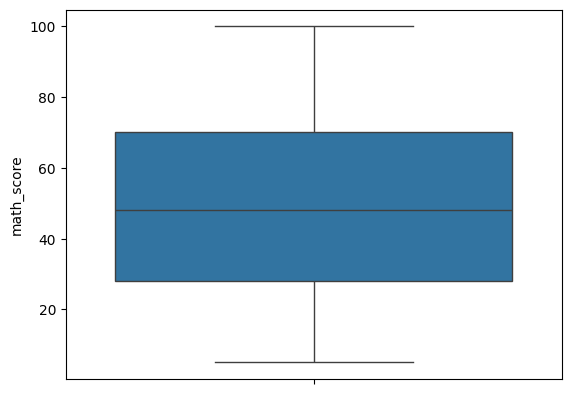

In [ ]:
sns.boxplot(df['math_score'])

# 📚 Theory

## 1️⃣ Data Preprocessing

**Data preprocessing** is the umbrella term for all techniques used to prepare raw data for analysis or machine learning models.  
It improves data quality and ensures that models can interpret the data accurately.

Typical steps:
- Handling missing values
- Encoding categorical variables
- Normalizing or scaling data
- Handling outliers
- Converting data types

---

## 2️⃣ Data Formatting

**Data formatting** is the process of ensuring that all variables in a dataset have the correct and consistent data types and structures.

Examples:
- Converting date columns from string to `datetime`
- Changing numerical columns from `object` to `int` or `float`
- Standardizing formats (e.g., "Yes"/"No" → 1/0)

---

## 3️⃣ Data Normalization

**Data normalization** scales numeric data into a standard range (often [0,1]) or to have similar statistical properties.

Common techniques:
- **Min-Max Scaling** → scales features between 0 and 1
- **Z-score Standardization** → centers data to mean 0 and std. dev 1

Normalization is important for distance-based models like KNN, SVM, or clustering.

---

## 4️⃣ Data Cleaning

**Data cleaning** is the process of identifying and correcting (or removing) errors and inconsistencies in the dataset.

Includes:
- Removing duplicates
- Handling missing values
- Correcting wrong or inconsistent entries
- Fixing typos in categorical data

---

## 5️⃣ Skewness of Data

**Skewness** measures how asymmetric a distribution is.

- **Right-skewed (Positive skew)** → Tail on the right, mean > median  
- **Left-skewed (Negative skew)** → Tail on the left, mean < median  
- **Zero skewness** → Symmetrical (normal distribution)

> _Why it matters?_  
> Many statistical models assume normal (symmetric) distributions.

---

## 6️⃣ Outliers

**Outliers** are data points that are significantly different from other observations.

They can:
- Skew statistical measures like mean and variance
- Mislead models (especially linear models)

---

## 7️⃣ Handling Outliers

Techniques:
- **Removal**: Drop outliers if they are errors or irrelevant
- **Capping (Winsorizing)**: Replace extreme values with nearest acceptable value (e.g., 95th percentile)
- **Transformation**: Apply log or square root transformations to reduce effect
- **Model-based methods**: Use robust models like tree-based models that ignore outliers

---

## 8️⃣ Handling Missing Data

Methods:
- **Removal**: Drop rows or columns with missing values (if few)
- **Imputation**: Fill missing values with:
  - Mean, median, or mode (for numerical)
  - Constant value or "Unknown" (for categorical)
- **Advanced Imputation**: Use KNN, regression, or ML models to predict missing values

---

## 9️⃣ Data Transformation

**Data transformation** involves applying mathematical functions to variables to improve their properties for analysis or modeling.

Common transformations:
- **Log Transform**: For right-skewed data
- **Square Root**: For moderate skewness
- **Box-Cox / Yeo-Johnson**: For normalizing data to a Gaussian distribution

---

## 1️⃣0️⃣ Handling Null Values

Null values are explicitly missing data (marked as `NaN` or `None`).

Techniques:
- **Detection**: `df.isnull().sum()`
- **Removal**: `df.dropna()`
- **Imputation**: `df.fillna(value)`  

Strategy depends on:
- Amount of missing data
- Importance of feature

---

# 🎤 Viva Q&A

| **Question** | **Answer** |
|--------------|------------|
| What is data preprocessing? | The process of cleaning and preparing raw data for analysis or modeling. |
| What is data formatting? | Ensuring variables have correct and consistent data types and formats. |
| What is data normalization? | Scaling numeric data into a standard range (like 0-1) or distribution. |
| What is data cleaning? | Detecting and correcting errors or inconsistencies in a dataset. |
| What is skewness of data? | A measure of asymmetry in the distribution of data. |
| What is an outlier? | A data point that is significantly different from other observations. |
| How do you handle outliers? | Remove, cap, transform, or use robust models that ignore outliers. |
| How do you handle missing data? | Remove rows/columns or impute missing values using mean, median, or models. |
| What is data transformation? | Applying mathematical functions to variables to improve their properties. |
| How do you handle null values? | Detect using `isnull()`, then remove or impute them. |
